<a href="https://colab.research.google.com/github/imZiho/Deep-Learning_Seminar/blob/main/MNIST%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST 손글씨 숫자 데이터셋**


엠니스트 (MNIST)라고 부름

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [ ]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 8.4 활성화 함수와 ReLU 함수

여기서는 RELU함수를 활성화 함수로 사용합니다.


RELU함수는 현대 딥러닝 분야에서 가장 기초가 되는 함수입니다.



RELU함수의 그래프를 출력한 후, 성질을 알아보겠다

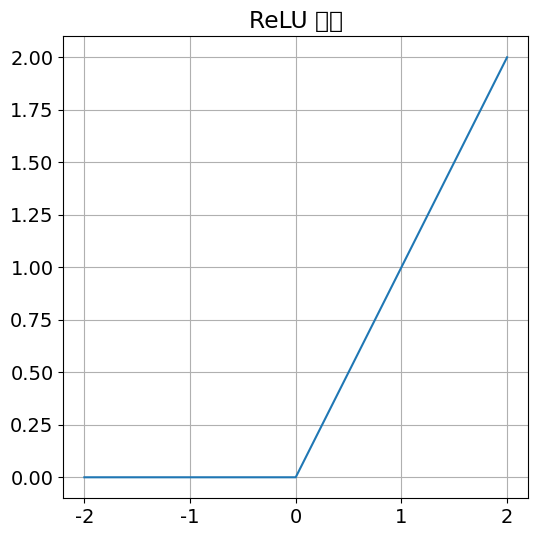

In [ ]:
# ReLU 함수의 그래프

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU 함수')
plt.show()        # 결과 확인: 입력값이 음수면 0으로, 양수값이면 그대로 흘려보내는 Y=X의 매우 간단한 함수

##GPU사용하기

**GPU디바이스 확인**

현재 환경이 GPU를 사용할 수 있는 상태인지를 체크하고 결과를 device변수에 저장해서 확인


In [ ]:
# 디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)           # 결과 확인: cuda:0은 gpu가 사용가능할 때 출력 결과

cuda:0


텐서변수 x,y를 정의한 다음,

두 변수 간 연산결과를 z에 대입해서 확인

In [ ]:
# 텐서 변수 x, y
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# x와 y 사이의 연산
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])




**1.  텐서변수는 데이터 전송을 목적으로 to함수를 사용할 수 있으며, cpu상의 데이터를 gpu로, gpu상의 데이터를 cpu로 보낼 수 있다.**


**2.   텐서변수는 device라는 속성을 가지며, 이 속성으로 자신이 CPU와 GPU 중 어디에 속하는지 확인할 수 있다**



변수 X를 GPU로 보낸 다음, X와Y의 device속성을 확인해보면

In [ ]:
# 변수 x를 GPU로 보냄
x = x.to(device)

# 변수 x와 y의 디바이스 속성 확인
print('x: ', x.device)
print('y: ', y.device)      #결과확인: x와y는 서로 다른 곳에 속해있는 것을 확인가능 (x:GPU/ y:CPU)

x:  cuda:0
y:  cpu


In [ ]:
# GPU상의 변수와 CPU상의 변수 간 연산 수행 시

z = x * y       # 결과확인: 오류발생

RuntimeError: ignored

**GPU사용규칙 중**

**두 변수 중 한쪽이 CPU, 다른 한쪽이 GPU에 올라가 있는 경우, 연산은 에러를 발생시킨다**

서로 다른 디바이스에 위치한 데이터 간 연산은 이처럼 런타임 에러를 발생시키는 것을 확인할 수있다.


In [ ]:
# y도 GPU로 보냄
y = y.to(device)

# 연산이 가능해짐
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.8 데이터 준비 1  (Dataset을 활용해 불러오기)



1.   데이터 입수
2.   데이터 전처리
3.   미니 배치용 데이터셋 생성



데이터 가져오기

In [ ]:
# 라이브러리 임포트
import torchvision.datasets as datasets

# 다운로드받을 디렉터리명
data_root = './data'

train_set0 = datasets.MNIST(
    # 원본 데이터를 다운로드받을 디렉터리 지정
    root = data_root,
    # 훈련 데이터인지 또는 검증 데이터인지
    train = True,
    # 원본 데이터가 없는 경우, 다운로드를 실행하는지 여부
    download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 75619700.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121989621.17it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 48880048.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22897270.15it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



데이터가 어떤 형태로 다운로드됐는지 확인

In [ ]:
# 다운로드한 파일 확인

!ls -lR ./data/MNIST        #이 결과는 MNIST 데이터셋을 구성하는 이미지와 레이블 데이터 파일의 크기와 압축 여부 등을 보여주고 있습니다.

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Aug 29 16:15 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Aug 29 16:15 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Aug 29 16:15 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Aug 29 16:15 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Aug 29 16:15 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Aug 29 16:15 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Aug 29 16:15 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Aug 29 16:15 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Aug 29 16:15 train-labels-idx1-ubyte.gz


**참고**


!ls -lR ./data/MNIST은 리눅스나 유닉스 기반의 명령어로,

현재 디렉터리에서 시작하여 ./data/MNIST 디렉터리 아래에 있는 모든 파일과 하위 디렉터리의 내용을 재귀적으로 리스트 형식으로 출력하는 명령입니다.

이 명령을 사용하면 딥러닝 모델에서 사용할 데이터가 어떤 구조로 저장되었는지 확인할 수 있습니다.

이 결과를 보면 ./data/MNIST 디렉토리 아래에 raw 디렉토리가 있으며, 해당 디렉토리 내에 MNIST 데이터셋 파일들이 존재하는 것을 확인할 수 있습니다.

In [15]:
# 데이터 건수 확인
print('데이터 건수: ', len(train_set0))

# 첫번째 요소 가져오기
image, label = train_set0[0]

# 데이터 타입 확인
print('입력 데이터 타입 : ', type(image))         # len()함수를 이용하여 확인해보면 훈련용 데이터셋이 총 6만건임을 확인할 수 있다.
print('정답 데이터 타입 : ', type(label))

데이터 건수:  60000
입력 데이터 타입 :  <class 'PIL.Image.Image'>
정답 데이터 타입 :  <class 'int'>


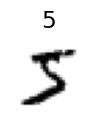

In [16]:
# 입력 데이터를 이미지로 출력

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

Matplotlib 라이브러리를 사용하여 이미지를 시각화하는 코드입니다.



*   figsize=(1, 1)은 그림의 크기를 가로 1 단위, 세로 1 단위로 설정하는 것을 의미합니다. 그림의 크기를 조절할 때 사용됩니다.


*   plt.axis('off'): 축을 표시하지 않도록 설정하는 명령입니다. 이미지에는 좌표축이 필요 없는 경우가 많으므로 시각적으로 깔끔하게 표시하기 위해 사용됩니다.


**결과 확인:  크기가 1x1인 그림으로 이미지와 레이블이 표시됩니다**



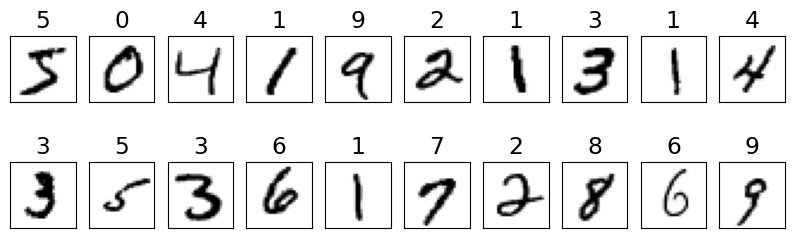

In [17]:
# 정답 데이터와 함께 처음 20개 데이터를 이미지로 출력

plt.figure(figsize=(10, 3))
for i in range(20):     # 그림이 20개여서 반복문 20번 실행
    ax = plt.subplot(2, 10, i + 1)

    # image와 label 취득
    image, label = train_set0[i]

    # 이미지 출력
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()                            # 결과확인: 이미지와 라벨이 잘 출력된것을 확인가능

## 8.9 데이터 준비 2  (Transforms를 활용한 데이터 전처리)

### 스텝 1. ToTensor 사용하기

첫번째로 totnesor클래스를 사용한다


이는 입력데이터의 형식을 파이토치에서 사용할 수 있게 텐서 형식으로 변환해 주는 클래스이다

In [18]:
# 라이브러리 임포트
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [19]:
# 변환 결과 확인

image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())      #결과 확인: shape은 [1,28,28]이며 최솟값은 0 최대값은 1인 데이터라는것을 확인할 수 있다

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(0.)
최댓값 :  tensor(1.)


### 스텝 2. Normalize 사용하기

학습데이터의 범위가 이미 [0,1]로 정규화 되어있지만 이를 [-1,1]로 뱐경하고 싶다고 가정

normalize 클래스를 사용해서 데이터를 정규화한다.

In [22]:
transform2 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),

    # 데이터 정규화
    transforms.Normalize(0.5,  0.5),
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

**참고**



1.   입력 데이터의 평균과 표준 편차를 사용하여 데이터를 정규화합니다.
2.   여기서는 입력 데이터의 평균을 0.5, 표준 편차를 0.5로 설정하여 정규화를 수행합니다.



In [23]:
# 변환 결과 확인

image, label = train_set2[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())        # 결과확인: 원래는 [0,1]이었던 데이터의 범위가 의도한 대로 [-1,1]이 된것을 확인가능

shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


### 스텝 3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

마지막으로 전결합형 신경망에 입력하기 위해 입력변수의 shape를 [1,28,28]에서 [784]로 변경한다

In [24]:
transform3 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),

    # 데이터 정규화
    transforms.Normalize(0.5, 0.5),

    # 현재 텐서를 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),        # x.view(-1)은 텐서를 1차원 벡터로 변환합니다.
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,
    download=True, transform = transform3)

**참고**

전결합성 신경망(Fully Connected Neural Network), 또는 밀집 신경망(Dense Neural Network)은 딥러닝의 기본적인 아키텍처 중 하나입니다.

 이 아키텍처는 입력층, 은닉층(들), 그리고 출력층으로 구성됩니다.

**전결합성 신경망**

전결합성 신경망은 입력 데이터의 차원이 고정되어 있어야 하기 때문에 입력 데이터의 shape을 조정해야 할 수 있습니다.

 입력 데이터의 크기(shape)는 네트워크의 아키텍처에 맞게 고정되어야 합니다.

 전결합성 신경망은 입력 데이터의 차원이 모든 샘플에서 동일해야 합니다. 즉, 각 샘플의 입력 데이터의 shape이 동일해야 합니다.

 전결합성 신경망을 사용할 때는 입력 데이터의 shape을 모델에 맞게 조절하는 과정이 중요합니다.

In [25]:
# 변환 결과 확인

image, label = train_set3[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


### 최종 구현 형태

마지막으로 전처리 과정을 확인하는 코드입니다.

주석으로 각 변환 단계가 어떤 작업을 수행하는지 설명하고 있습니다.

In [26]:
# 데이터 변환용 함수 Transforms
# (1) Image를 텐서화
# (2) [0, 1] 범위의 값을 [-1, 1] 범위로 조정
# (3) 데이터의 shape을 [1, 28, 28] 에서 [784] 로 변환

transform = transforms.Compose([
    # (1) 데이터를 텐서로 변환
    transforms.ToTensor(),

    # (2) 데이터 정규화
    transforms.Normalize(0.5, 0.5),

    # (3) 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

In [27]:
# 데이터 입수를 위한 Dataset 함수

# 훈련용 데이터셋 정의
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 검증용 데이터셋 정의
test_set = datasets.MNIST(
    root = data_root, train = False,
    download = True, transform = transform)

## 8.10 데이터 준비 3  (데이터로더를 활용한 미니 배치 데이터 생성)

데이터 준비에 관한 마지막 작업으로, 미니 배치 처리의 준비가 남아있다


In [28]:
# 라이브러리 임포트
from torch.utils.data import DataLoader

# 미니 배치 사이즈 지정
batch_size = 500

# 훈련용 데이터로더
# 훈련용이므로, 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size,
    shuffle = True)

# 검증용 데이터로더
# 검증시에는 셔플을 필요로하지 않음
test_loader = DataLoader(
    test_set,  batch_size = batch_size,
    shuffle = False)

In [29]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader))

# 데이터로더로부터 가장 처음 한 세트를 가져옴
for images, labels in train_loader:
    break

print(images.shape)                         #결과확인: 결과로 나온 120은 60000/500의 계산결과가 일치하고있음을 알수있다
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


## 8.11 모델 정의


입력차원수와 출력차원수를 설정한 후 여기서는 추가로 은닉층의 노드 수도 정의

In [30]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(set(list(labels.data.numpy())))

# 은닉층의 노드 수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [32]:
# 모델 클래스 정의
# 784입력 10출력 128은닉층의 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층 노드 수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층 정의
        self.l2 = nn.Linear(n_hidden, n_output)           # 선형함수가 2개 존재하고

        # ReLU 함수 정의                                  # 활성화함수도 클래스 안에서 정의하고 있으며
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)                              # 포워드 함수 내부에서 첫번쨰 선형 함수의 출력에 대해 렐루함수를 적용하고있고
        x3 = self.l2(x2)                                # 두번째 선형함수에 대해서는 활성화함수가 따로 적용되지 않는것은 손실함수에서 소프트맥스 함수를 포함할 예정이라고 함
        return x3

In [33]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden)

# 모델을 GPU로 전송
net = net.to(device)      # 여기서 to함수를 호출해 모델을 gpu측으로 전송하고 있는 점이 지금까지의 구현과는 다르다함

In [39]:
print(net)                # 모델의 개요를 표시해 확인해보면 선형함수의 인스턴스가 2개로 늘어난 점과 렐루 인스턴스가 생성된 것을 알 수있다

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


## 8.12 경사 하강법

### 예측 계산

In [40]:
# 훈련 데이터셋의 가장 처음 항목을 취득
# 데이터로더에서 가장 처음 항목을 취득
for images, labels in train_loader:
    break

In [41]:
# 데이터로더에서 취득한 데이터를 GPU로 보냄
inputs = images.to(device)
labels = labels.to(device)

In [42]:
# 예측 계산
outputs = net(inputs)

# 결과 확인
print(outputs)

tensor([[-0.3622, -0.1927, -0.0179,  ...,  0.1073,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0716,  ...,  0.1866,  0.1975,  0.1161],
        [-0.3221, -0.0547, -0.2868,  ...,  0.1967, -0.0103,  0.1591],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0665,  0.0987],
        [-0.2756, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0233],
        [-0.3045, -0.2458,  0.1416,  ...,  0.1012,  0.0820, -0.1457]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### 손실 함수

#### 손실 계산함과 동시에 그래프 시각화

2.3328874111175537


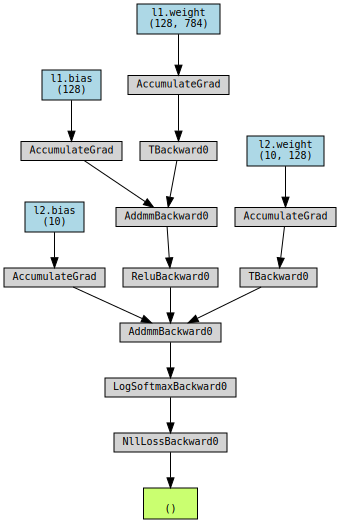

In [43]:
#  손실 계산
loss = criterion(outputs, labels)

# 손실값 가져오기
print(loss.item())

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)                                              # 이전 까지는  bias와 weight가 한개였는데 2개로 출력되는 것을 확인할 수있다(이는 선형함수를 2개 사용한것을 의미한다)

### 반복 계산

아래와 같은 초기화로 반복계산을 실행하고
반복처리 루프는 훈련페이즈와 예측페이즈로 이루어져 처리

In [45]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history = np.zeros((0,5))

In [ ]:
# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm

# 반복 계산 메인 루프
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)


        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.82932 acc: 0.56958 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 1.03888 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.45883 acc: 0.87878 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.40813 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.39176 acc: 0.89065 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.36812 acc: 0.89592 val_loss: 0.34868, val_acc: 0.90160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.35910 acc: 0.89783 val_loss: 0.34089, val_acc: 0.90220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.35147 acc: 0.89977 val_loss: 0.33336, val_acc: 0.90490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.34477 acc: 0.90135 val_loss: 0.32806, val_acc: 0.90570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.33860 acc: 0.90310 val_loss: 0.32334, val_acc: 0.90710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.33333 acc: 0.90412 val_loss: 0.31807, val_acc: 0.90790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.32843 acc: 0.90520 val_loss: 0.31445, val_acc: 0.90930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.32380 acc: 0.90700 val_loss: 0.31076, val_acc: 0.91090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.31950 acc: 0.90807 val_loss: 0.30586, val_acc: 0.91190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.31587 acc: 0.90905 val_loss: 0.30281, val_acc: 0.91240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.31199 acc: 0.91032 val_loss: 0.29965, val_acc: 0.91520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.30842 acc: 0.91098 val_loss: 0.29713, val_acc: 0.91430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.30507 acc: 0.91195 val_loss: 0.29432, val_acc: 0.91570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.30190 acc: 0.91320 val_loss: 0.29123, val_acc: 0.91770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.29883 acc: 0.91403 val_loss: 0.28884, val_acc: 0.91700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.29597 acc: 0.91492 val_loss: 0.28646, val_acc: 0.91820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.29311 acc: 0.91662 val_loss: 0.28365, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.29027 acc: 0.91698 val_loss: 0.28185, val_acc: 0.92000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.28765 acc: 0.91798 val_loss: 0.28041, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

## 8.13 결과 확인

In [ ]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

In [ ]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련')
plt.plot(history[:,0], history[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

In [ ]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='훈련')
plt.plot(history[:,0], history[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

##추가실습_은닉층추가


In [ ]:
# 모델 정의
# 784입력 10출력을 갖는 2개의 은닉층을 포함한 신경망

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 첫번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 두번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 출력층 정의
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [ ]:
# 모델 개요 표시 1

print(net)

In [ ]:
# 경사 계산
loss.backward()

# 경사 계산 결과 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

In [ ]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f}  정확도 : {history2[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history2[-1,3]:.5f}  정확도 : {history2[-1,4]:.5f}' )        # 여기서는 실행 안되는데 책 참고하면 이전 정확도보다 1%향상(은닉층2개로 늘린 효과 미미)